# Image Recognition Algorithm

Wilking Chali Alphonse 
11/25/2024

## Problem Definition


This is a supervised clasification problem. 

The goal is to create a ML model with Tensorflow / Keras and create a convolutional neural network to identify if an image is a cat or a dog based on multiple inputs.


## Imports

In [1]:
import pickle
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Data Collection & Path

In [2]:
Xurl = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle' # Training set url

In [3]:
Yurl = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle' # Testing set url

In [4]:
s3 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg' # Dog image to measure model performance

In [5]:
Xdata_load = pd.read_pickle(Xurl) # Reading Pickle file with pandas

In [6]:
Ydata_load = pd.read_pickle(Yurl)  # Reading Pickle file with pandas

## Data Cleaning

Let's make a copy of both sets so we can have a checkpoint in case we need to re-start our work

In [175]:
X = Xdata_load.copy()
Y = Ydata_load.copy()
Y = np.array(Ydf)

In [177]:
X_scaled = X/255.0 # Scaling X so values fall between 0 and 1 

## Exploratory Data Analysis


Check values of X and Y

### X Values

In [12]:
X_scaled.shape, Y.shape

((24946, 100, 100, 1), (24946,))

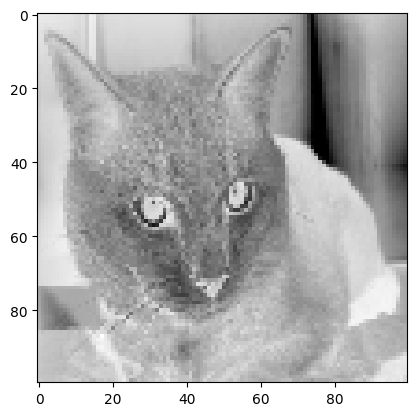

In [13]:
plt.imshow(X_scaled[66,:,:,0],cmap = plt.cm.gray_r )
plt.show()

### Y Values

In [14]:
Y[66] # 0 = dog and 1 = cats

1

## Data Processing


* Split X and y into training and testing sets.

In [178]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=42)

In [180]:
X_train.shape, X_test.shape,  y_train.shape , y_test.shape

((18709, 100, 100, 1), (6237, 100, 100, 1), (18709,), (6237,))

Function in pause, just in case normalization it's needed 

In [134]:
# from sklearn.preprocessing import StandardScaler

# def scale_4d_array(array):
#   """Scales a 4D NumPy array using StandardScaler.

#   Args:
#     array: The 4D NumPy array to scale.

#   Returns:
#     The scaled 4D NumPy array.
#   """

#   # Reshape the 4D array to a 2D array for efficient scaling
#   reshaped_array = array.reshape(-1, array.shape[-1])

#   # Create a StandardScaler object
#   scaler = StandardScaler()

#   # Fit the scaler to the reshaped data
#   scaler.fit(reshaped_array)

#   # Transform the data
#   scaled_array = scaler.transform(reshaped_array)

#   # Reshape the scaled data back to the original 4D shape
#   scaled_array = scaled_array.reshape(array.shape)

#   return scaled_array

In [136]:
# X_train =scale_4d_array(X_train)
# X_test = scale_4d_array(X_test)

Let's start our convolutional sequential model and compile it 

In [181]:
model = Sequential()

# Define input layer

model.add(
  Conv2D(name = "input",input_shape = X_train.shape[1:],
         filters = 8, kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
    MaxPooling2D(pool_size=(2,2))
)

# Define second hidden layer
model.add(
  Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu',
  )
)

model.add(
  MaxPooling2D(pool_size=(2,2))
)

model.add( Flatten()
)

# Define output layer
model.add(
  Dense(name = "output",units = 1,activation = 'sigmoid',
  )
)


# Compile model
model.compile(
  optimizer = 'adam',
  loss = 'binary_crossentropy',
  metrics = ['accuracy'],
)


### Fit model

In [138]:
X_train.shape, y_train.shape # Check set shape values

((18709, 100, 100, 1), (18709,))

In [182]:
# Fit model using training data
model.fit(X_train, y_train, epochs=12) ;

Epoch 1/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5744 - loss: 0.6700
Epoch 2/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6928 - loss: 0.5817
Epoch 3/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7236 - loss: 0.5435
Epoch 4/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7375 - loss: 0.5235
Epoch 5/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7564 - loss: 0.5035
Epoch 6/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7717 - loss: 0.4820
Epoch 7/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7701 - loss: 0.4799
Epoch 8/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7791 - loss: 0.4682
Epoch 9/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7866 - loss: 0.4555
Epoch 10/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7869 - loss: 0.4499
Epoch 11/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7940 - loss: 0.4409
Epoch 12/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [143]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Conv2D)                  │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │        33,857 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,277 (837.02 KB)

 Trainable params: 71,425 (279.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,852 (558.02 KB)

#### Testing the model with testing set

In [183]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7669 - loss: 0.4900
0.4857872426509857
0.7673560976982117


### Function to 4D

In [28]:
import glob
import os
import cv2
import requests
import io
from PIL import Image

In [3]:
def image4d (url):
    ''' 
    This function fethces an image and converts it into a numpy array
    '''
    response = requests.get(url, stream=True)
    img = Image.open(io.BytesIO(response.content)).convert('L')
    img = np.array(img)
    return img

In [30]:
dog = image4d(s3) # Apply the function to our s3 url 

In [31]:
resized_image = cv2.resize(doggy, (100, 100))

# Reshape to 4D with a batch dimension of 1
final = resized_image.reshape(1, 100, 100, 1 )

final.shape  # Output: (1, 100, 100, 3)

(1, 100, 100, 1)


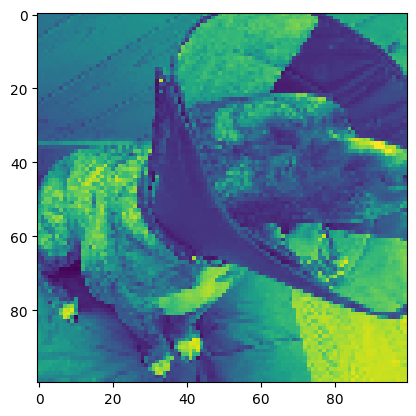

In [169]:
plt.imshow(final[0]) # Display the image after being processed 
plt.show()

In [189]:
model.predict(final) # Take a look at the prediction value of our model 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.]], dtype=float32)

Display model prediction

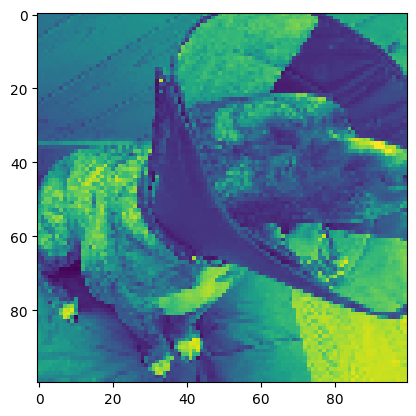

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Our model predict this image to be a:  dog


In [192]:
plt.imshow(final[0])
plt.show()

predictions = model.predict(final)
predictions = predictions > 0.5

if (predictions == 1):
  pred1 = 'dog'
else:
  pred1 = 'cat'

print("Our model predict this image to be a: ", pred1)

## Communication of Results


for our convolutional neural network:
* We have an accuracy of 0.78 and a loss of 0.4
* Our model can definitely improve with more changes
* The lowest the filters for our model was the best results and lower loss value we got.
  

## **BONUS** (optional)


* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.

In [67]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive

In [68]:
# pics = '/content/drive/MyDrive/Deep Learning/cat 1.jpg'

In [44]:
%%capture output # Capture output 
!conda install -y gdown # Install Google library since we're working in Kaggle

In [ ]:
# https://drive.google.com/file/d/11i57W44MuOaIPsibk9xmNQgCwO307XPi/view?usp=drive_link #(Picture path in drive)

In [47]:
# %%capture output
!gdown --id 11i57W44MuOaIPsibk9xmNQgCwO307XPi #Fetch image to pwd

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11i57W44MuOaIPsibk9xmNQgCwO307XPi
To: /kaggle/working/cat 5.webp
100%|████████████████████████████████████████| 280k/280k [00:00<00:00, 84.0MB/s]


In [49]:
!ls -la # Make sure that the image is in our directory 

total 288
drwxr-xr-x 3 root root   4096 Nov 24 01:38  .
drwxr-xr-x 5 root root   4096 Nov 24 01:18  ..
drwxr-xr-x 2 root root   4096 Nov 24 01:18  .virtual_documents
-rw-r--r-- 1 root root 279900 Nov 23 02:09 'cat 5.webp'


In [1]:
def bonus(filepath):
    ''' 
  This function takes the imported picture and resize it to an 100, 100, 1 array  
    '''
    IMG_SIZE = 100
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [55]:
cat = bonus('cat 5.webp') # Apply function to cat image 

In [56]:
type(cat), cat.shape

(numpy.ndarray, numpy.ndarray)

* Display model prediction

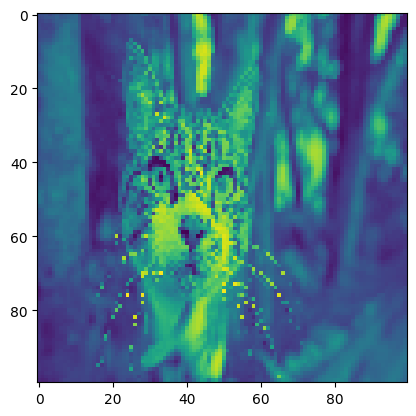

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Our model predict this image to be a:  cat


In [196]:
plt.imshow(cat[0])
plt.show()

prediction = model.predict(cat)
prediction = prediction > 0.5

if (predictions == 0):
  pred = 'dog'
else:
  pred = 'cat'

print("Our model predict this image to be a: ", pred)

In [193]:
model.predict(cat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.]], dtype=float32)

In [76]:
# class_pred = (prediction > 0.5).astype("int32")
# class_pred